In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

## Loading Data

In [2]:
#loading salary data

dfSalary = pd.read_csv("Salary.csv")
dfSalary.head()

#loading player stats data

dfPlayer = pd.read_csv("playerStats2021.csv", encoding="latin1", delimiter= ";")
dfPlayer

#combining data

# creating a common column to join by
dfSalary['Player'] = dfSalary['First'] + " " + dfSalary['Last']

# Merge DataFrames on a common column
df = pd.merge(dfSalary, dfPlayer, on='Player', how='inner')

# Handle duplicates or missing values if necessary
df.drop_duplicates(subset=['First', 'Last', 'Salary'], inplace=True)  # Drop duplicate rows
df.dropna(inplace=True)  # Drop rows with missing values

# drop new row
df.drop(columns=['Player'], inplace=True)
pd.set_option('display.max_columns', None)
df

,First,Last,Salary,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Stephen,Curry,45780966.0,126,PG,33,GSW,64,64,34.5,8.4,19.1,0.437,4.5,11.7,0.380,3.9,7.4,0.527,0.554,4.3,4.7,0.923,0.5,4.7,5.2,6.3,1.3,0.4,3.2,2.0,25.5
1,James,Harden,44310840.0,218,PG-SG,32,TOT,65,65,37.2,6.3,15.3,0.410,2.3,6.9,0.330,4.0,8.4,0.476,0.485,7.2,8.2,0.877,0.8,6.8,7.7,10.3,1.3,0.6,4.4,2.4,22.0
4,Russell,Westbrook,44211146.0,576,PG,33,LAL,78,78,34.3,7.0,15.8,0.444,1.0,3.4,0.298,6.0,12.4,0.485,0.476,3.4,5.1,0.667,1.4,6.0,7.4,7.1,1.0,0.3,3.8,3.0,18.5
5,Kevin,Durant,42018900.0,154,PF,33,BRK,55,55,37.2,10.5,20.3,0.518,2.1,5.5,0.383,8.4,14.8,0.568,0.570,6.8,7.4,0.910,0.5,6.9,7.4,6.4,0.9,0.9,3.5,2.1,29.9
6,LeBron,James,41180544.0,274,SF,37,LAL,56,56,37.2,11.4,21.8,0.524,2.9,8.0,0.359,8.6,13.8,0.620,0.590,4.5,6.0,0.756,1.1,7.1,8.2,6.2,1.3,1.1,3.5,2.2,30.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,Micah,Potter,53176.0,456,C,23,DET,3,0,10.3,1.7,3.7,0.455,0.0,0.7,0.000,1.7,3.0,0.556,0.455,0.7,0.7,1.000,1.3,1.7,3.0,0.0,0.3,0.3,0.3,1.3,4.0
693,Trayvon,Palmer,53176.0,434,SG,27,DET,1,0,17.0,0.0,1.0,0.000,0.0,0.0,0.000,0.0,1.0,0.000,0.000,0.0,0.0,0.000,0.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0
694,Tre,Scott,53176.0,494,SF,25,CLE,2,0,5.5,1.5,3.0,0.500,0.0,0.5,0.000,1.5,2.5,0.600,0.500,0.0,0.0,0.000,0.5,0.5,1.0,0.0,0.5,0.5,0.0,1.0,3.0
695,Zavier,Simpson,37223.0,505,PG,24,OKC,4,4,43.5,4.8,13.0,0.365,0.3,2.0,0.125,4.5,11.0,0.409,0.375,1.3,1.3,1.000,0.5,4.8,5.3,7.5,1.3,1.0,2.5,3.8,11.0


In [3]:
# Calculate the mean of the Salary column
mean_salary = df['Salary'].mean()
print("Mean Salary:", mean_salary)

Mean Salary: 6417179.861742424


# Ajusting Salaries

# Histogram 1
 - No removed Data

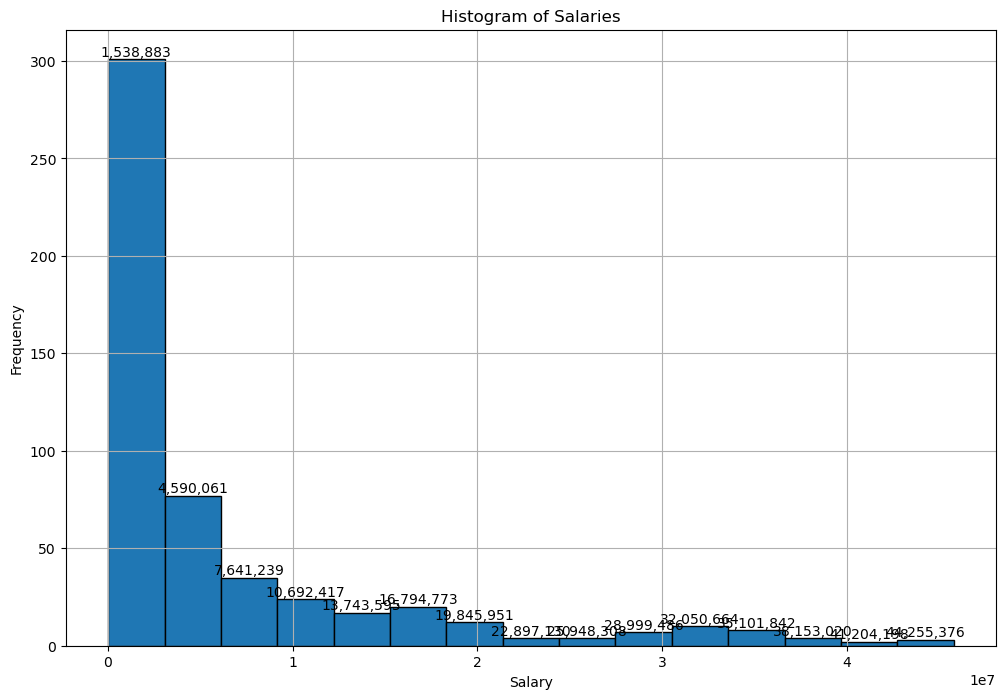

In [4]:
# Create a larger histogram of the Salary column with 10 bins
plt.figure(figsize=(12, 8))  # Adjusted the figure size to be larger
n, bins, patches = plt.hist(df['Salary'], bins=15, edgecolor='black')

# Adding labels to the bins
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for count, x in zip(n, bin_centers):
    plt.text(x, count, f'{int(x):,}', ha='center', va='bottom')

plt.title('Histogram of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [5]:
# Filter the DataFrame to include only players with salaries <= 12 million
filtered_df = df[df['Salary'] <= 12000000]
filtered_df

,First,Last,Salary,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
114,Josh,Hart,12000000.0,226,SG-SF,26,TOT,54,53,33.2,5.3,10.5,0.504,1.4,3.9,0.343,4.0,6.6,0.601,0.569,3.0,3.9,0.758,1.1,6.0,7.2,4.1,1.1,0.2,2.1,2.8,14.9
117,Josh,Richardson,11615328.0,474,SG,28,TOT,65,7,24.6,3.6,8.2,0.438,1.6,3.8,0.415,2.0,4.4,0.458,0.534,1.5,1.7,0.889,0.6,2.2,2.8,1.8,0.9,0.4,1.0,1.8,10.2
120,DeAndre,Jordan,11109327.0,300,C,33,TOT,48,20,13.0,1.9,3.0,0.643,0.0,0.0,0.000,1.9,3.0,0.643,0.643,0.5,0.8,0.550,1.7,3.8,5.5,0.4,0.3,0.7,0.8,1.5,4.3
123,Dwight,Powell,11080125.0,457,C,30,DAL,82,71,21.9,3.3,4.9,0.671,0.2,0.5,0.351,3.1,4.4,0.703,0.687,2.0,2.6,0.783,2.1,2.8,4.9,1.2,0.5,0.5,0.8,2.7,8.7
124,Jeremy,Lamb,10500000.0,321,SF-SG,29,TOT,56,0,16.7,2.4,6.2,0.383,1.0,3.0,0.324,1.4,3.2,0.441,0.463,1.6,1.9,0.840,0.5,2.3,2.8,1.4,0.6,0.4,0.7,1.1,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,Micah,Potter,53176.0,456,C,23,DET,3,0,10.3,1.7,3.7,0.455,0.0,0.7,0.000,1.7,3.0,0.556,0.455,0.7,0.7,1.000,1.3,1.7,3.0,0.0,0.3,0.3,0.3,1.3,4.0
693,Trayvon,Palmer,53176.0,434,SG,27,DET,1,0,17.0,0.0,1.0,0.000,0.0,0.0,0.000,0.0,1.0,0.000,0.000,0.0,0.0,0.000,0.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0
694,Tre,Scott,53176.0,494,SF,25,CLE,2,0,5.5,1.5,3.0,0.500,0.0,0.5,0.000,1.5,2.5,0.600,0.500,0.0,0.0,0.000,0.5,0.5,1.0,0.0,0.5,0.5,0.0,1.0,3.0
695,Zavier,Simpson,37223.0,505,PG,24,OKC,4,4,43.5,4.8,13.0,0.365,0.3,2.0,0.125,4.5,11.0,0.409,0.375,1.3,1.3,1.000,0.5,4.8,5.3,7.5,1.3,1.0,2.5,3.8,11.0


# Filtered Salaries 
 - Max salary of 12 Million

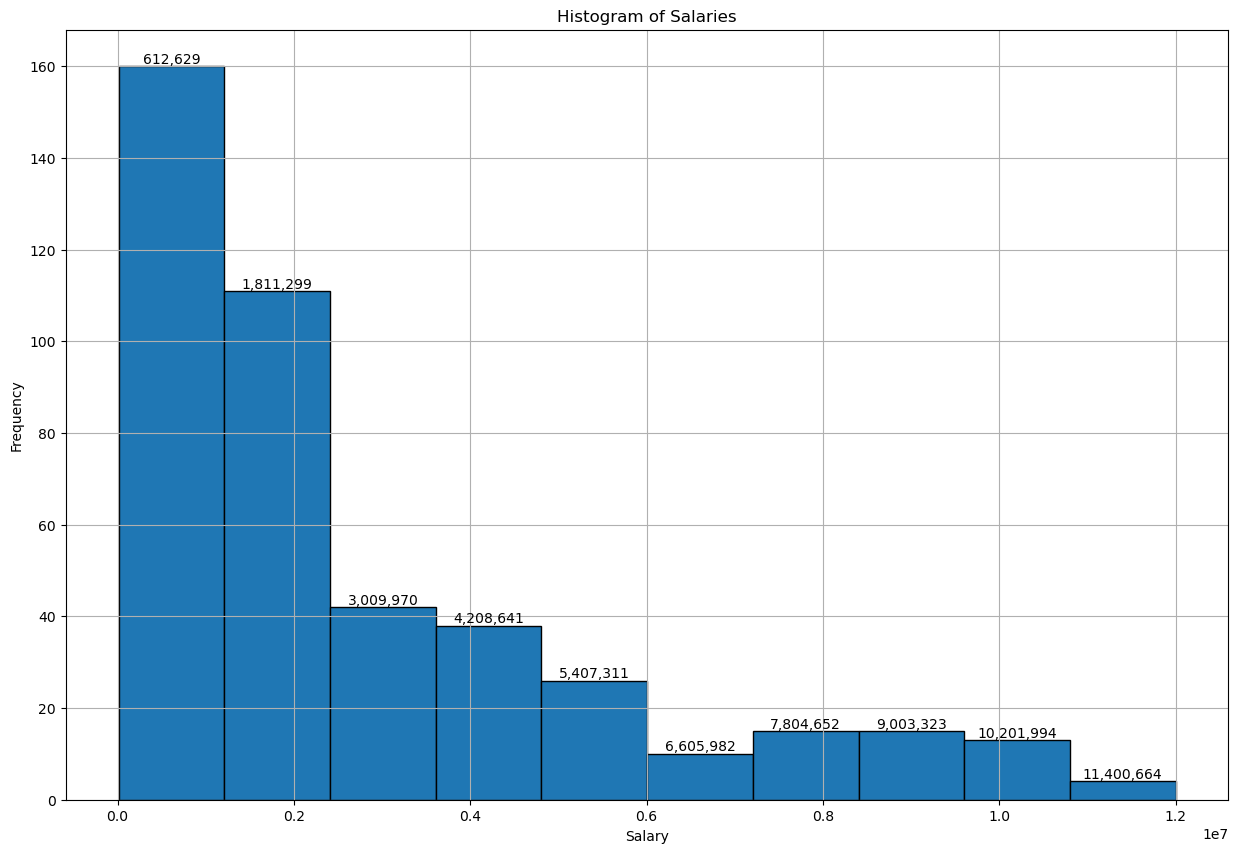

In [6]:
# Create a larger histogram of the Salary column with 10 bins
plt.figure(figsize=(15, 10))  # Adjusted the figure size to be larger
n, bins, patches = plt.hist(filtered_df['Salary'], bins=10, edgecolor='black')

# Adding labels to the bins
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for count, x in zip(n, bin_centers):
    plt.text(x, count, f'{int(x):,}', ha='center', va='bottom')

plt.title('Histogram of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [7]:
# Calculate the mean of the Salary column
mean_salary = filtered_df['Salary'].mean()
print("Mean Salary:", mean_salary)

Mean Salary: 2717649.8571428573


# Filtering Salaries
 - Max of 10.5 Million

In [8]:
# Filter the DataFrame to include only players with salaries <= 12 million
filtered10_df = df[df['Salary'] <= 10500000]
filtered10_df

,First,Last,Salary,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
124,Jeremy,Lamb,10500000.0,321,SF-SG,29,TOT,56,0,16.7,2.4,6.2,0.383,1.0,3.0,0.324,1.4,3.2,0.441,0.463,1.6,1.9,0.840,0.5,2.3,2.8,1.4,0.6,0.4,0.7,1.1,7.3
127,Richaun,Holmes,10384500.0,247,C,28,SAC,45,37,23.9,4.4,6.7,0.660,0.0,0.1,0.400,4.4,6.6,0.664,0.663,1.6,2.0,0.778,2.1,5.0,7.0,1.1,0.4,0.9,1.2,2.8,10.4
128,Reggie,Jackson,10384500.0,273,SG,31,LAC,75,75,31.2,6.4,16.3,0.392,2.2,6.8,0.326,4.2,9.5,0.439,0.460,1.8,2.2,0.847,0.5,3.1,3.6,4.8,0.7,0.2,2.3,2.1,16.8
129,Anthony,Edwards,10245480.0,156,SG,20,MIN,72,72,34.3,7.6,17.3,0.441,3.0,8.4,0.357,4.6,8.9,0.519,0.527,3.1,3.9,0.786,0.9,3.9,4.8,3.8,1.5,0.6,2.6,2.3,21.3
130,Cade,Cunningham,10050120.0,124,PG,20,DET,64,64,32.6,6.7,16.1,0.416,1.8,5.7,0.314,4.9,10.4,0.472,0.471,2.2,2.6,0.845,0.9,4.6,5.5,5.6,1.2,0.7,3.7,3.1,17.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,Micah,Potter,53176.0,456,C,23,DET,3,0,10.3,1.7,3.7,0.455,0.0,0.7,0.000,1.7,3.0,0.556,0.455,0.7,0.7,1.000,1.3,1.7,3.0,0.0,0.3,0.3,0.3,1.3,4.0
693,Trayvon,Palmer,53176.0,434,SG,27,DET,1,0,17.0,0.0,1.0,0.000,0.0,0.0,0.000,0.0,1.0,0.000,0.000,0.0,0.0,0.000,0.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0
694,Tre,Scott,53176.0,494,SF,25,CLE,2,0,5.5,1.5,3.0,0.500,0.0,0.5,0.000,1.5,2.5,0.600,0.500,0.0,0.0,0.000,0.5,0.5,1.0,0.0,0.5,0.5,0.0,1.0,3.0
695,Zavier,Simpson,37223.0,505,PG,24,OKC,4,4,43.5,4.8,13.0,0.365,0.3,2.0,0.125,4.5,11.0,0.409,0.375,1.3,1.3,1.000,0.5,4.8,5.3,7.5,1.3,1.0,2.5,3.8,11.0


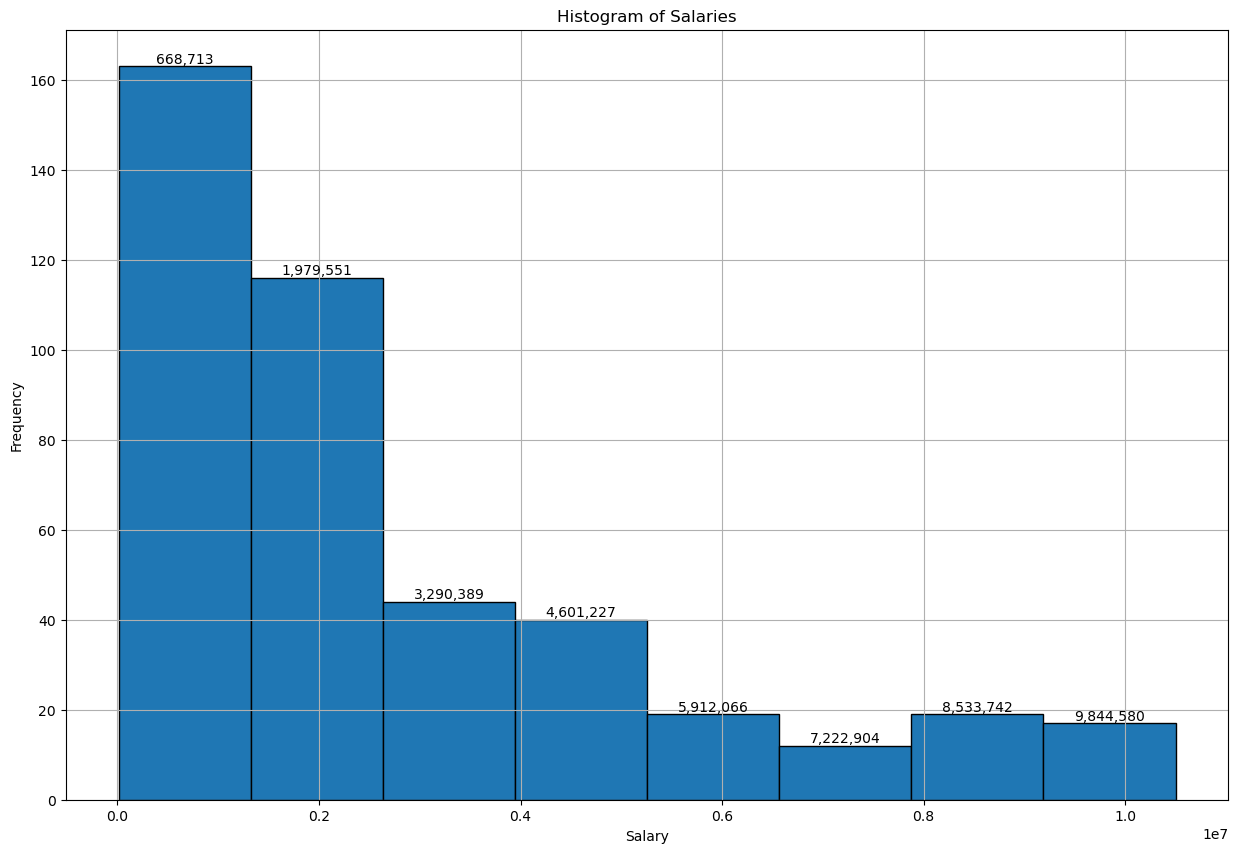

In [9]:
# Create a larger histogram of the Salary column with 10 bins
plt.figure(figsize=(15, 10))  # Adjusted the figure size to be larger
n, bins, patches = plt.hist(filtered10_df['Salary'], bins=8, edgecolor='black')

# Adding labels to the bins
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for count, x in zip(n, bin_centers):
    plt.text(x, count, f'{int(x):,}', ha='center', va='bottom')

plt.title('Histogram of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [10]:
# Calculate the mean of the Salary column
mean_salary = filtered10_df['Salary'].mean()
print("Mean Salary:", mean_salary)

Mean Salary: 2636407.576744186


# Filtering Salaries
- Maxing salaries at 20 Million

In [11]:
# Filter the DataFrame to include only players with salaries <= 12 million
filtered20_df = df[df['Salary'] <= 20000000]
filtered20_df

,First,Last,Salary,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
53,Jarrett,Allen,20000000.0,8,C,23,CLE,56,56,32.3,6.6,9.7,0.677,0.0,0.2,0.100,6.6,9.6,0.688,0.678,2.9,4.2,0.708,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1
54,Julius,Randle,19800000.0,467,PF,27,NYK,72,72,35.3,7.1,17.3,0.411,1.7,5.4,0.308,5.4,11.9,0.458,0.459,4.2,5.6,0.756,1.7,8.2,9.9,5.1,0.7,0.5,3.4,2.8,20.1
55,Fred,VanVleet,19675926.0,554,PG,27,TOR,65,65,37.9,6.8,16.9,0.403,3.7,9.9,0.377,3.1,7.0,0.440,0.513,3.0,3.4,0.874,0.7,3.8,4.4,6.7,1.7,0.5,2.6,2.5,20.3
56,Zach,LaVine,19500000.0,324,SF,26,CHI,67,67,34.7,8.4,17.7,0.476,2.8,7.1,0.389,5.7,10.6,0.534,0.554,4.8,5.6,0.853,0.3,4.3,4.6,4.5,0.6,0.3,2.6,1.8,24.4
57,Spencer,Dinwiddie,19314284.0,139,PG,28,TOT,67,51,29.6,4.6,11.0,0.416,1.7,4.9,0.339,2.9,6.0,0.479,0.493,2.9,3.8,0.774,0.7,3.5,4.2,5.2,0.7,0.2,1.6,2.2,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,Micah,Potter,53176.0,456,C,23,DET,3,0,10.3,1.7,3.7,0.455,0.0,0.7,0.000,1.7,3.0,0.556,0.455,0.7,0.7,1.000,1.3,1.7,3.0,0.0,0.3,0.3,0.3,1.3,4.0
693,Trayvon,Palmer,53176.0,434,SG,27,DET,1,0,17.0,0.0,1.0,0.000,0.0,0.0,0.000,0.0,1.0,0.000,0.000,0.0,0.0,0.000,0.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0
694,Tre,Scott,53176.0,494,SF,25,CLE,2,0,5.5,1.5,3.0,0.500,0.0,0.5,0.000,1.5,2.5,0.600,0.500,0.0,0.0,0.000,0.5,0.5,1.0,0.0,0.5,0.5,0.0,1.0,3.0
695,Zavier,Simpson,37223.0,505,PG,24,OKC,4,4,43.5,4.8,13.0,0.365,0.3,2.0,0.125,4.5,11.0,0.409,0.375,1.3,1.3,1.000,0.5,4.8,5.3,7.5,1.3,1.0,2.5,3.8,11.0


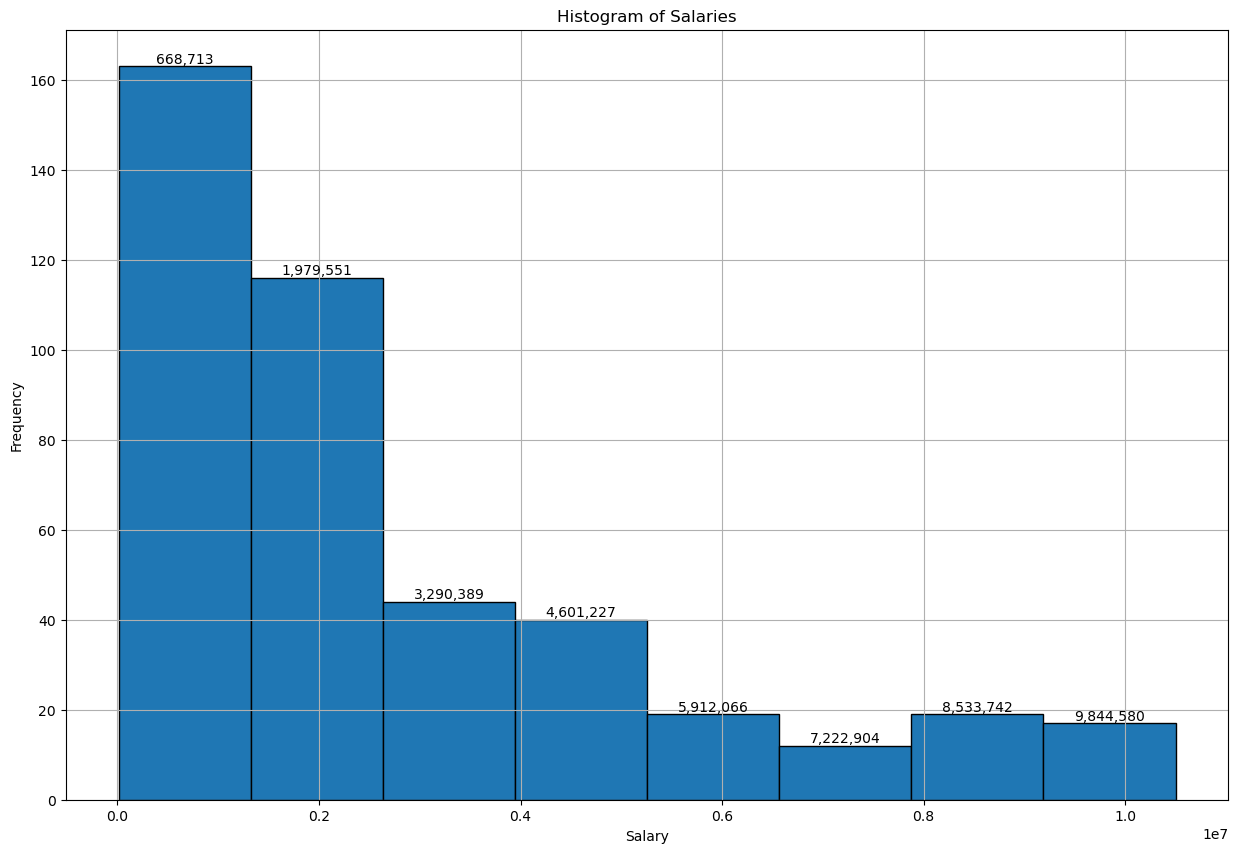

In [12]:
# Create a larger histogram of the Salary column with 10 bins
plt.figure(figsize=(15, 10))  # Adjusted the figure size to be larger
n, bins, patches = plt.hist(filtered10_df['Salary'], bins=8, edgecolor='black')

# Adding labels to the bins
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for count, x in zip(n, bin_centers):
    plt.text(x, count, f'{int(x):,}', ha='center', va='bottom')

plt.title('Histogram of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
# Calculate the mean of the Salary column
mean_salary = filtered20_df['Salary'].mean()
print("Mean Salary:", mean_salary)

Mean Salary: 3978157.681912682


In [14]:
# removing non numerical data
columns_to_remove = ['First', 'Last', 'Pos', 'Tm']
final_df = filtered10_df.drop(columns=columns_to_remove)
final_df

,Salary,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
124,10500000.0,321,29,56,0,16.7,2.4,6.2,0.383,1.0,3.0,0.324,1.4,3.2,0.441,0.463,1.6,1.9,0.840,0.5,2.3,2.8,1.4,0.6,0.4,0.7,1.1,7.3
127,10384500.0,247,28,45,37,23.9,4.4,6.7,0.660,0.0,0.1,0.400,4.4,6.6,0.664,0.663,1.6,2.0,0.778,2.1,5.0,7.0,1.1,0.4,0.9,1.2,2.8,10.4
128,10384500.0,273,31,75,75,31.2,6.4,16.3,0.392,2.2,6.8,0.326,4.2,9.5,0.439,0.460,1.8,2.2,0.847,0.5,3.1,3.6,4.8,0.7,0.2,2.3,2.1,16.8
129,10245480.0,156,20,72,72,34.3,7.6,17.3,0.441,3.0,8.4,0.357,4.6,8.9,0.519,0.527,3.1,3.9,0.786,0.9,3.9,4.8,3.8,1.5,0.6,2.6,2.3,21.3
130,10050120.0,124,20,64,64,32.6,6.7,16.1,0.416,1.8,5.7,0.314,4.9,10.4,0.472,0.471,2.2,2.6,0.845,0.9,4.6,5.5,5.6,1.2,0.7,3.7,3.1,17.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,53176.0,456,23,3,0,10.3,1.7,3.7,0.455,0.0,0.7,0.000,1.7,3.0,0.556,0.455,0.7,0.7,1.000,1.3,1.7,3.0,0.0,0.3,0.3,0.3,1.3,4.0
693,53176.0,434,27,1,0,17.0,0.0,1.0,0.000,0.0,0.0,0.000,0.0,1.0,0.000,0.000,0.0,0.0,0.000,0.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0
694,53176.0,494,25,2,0,5.5,1.5,3.0,0.500,0.0,0.5,0.000,1.5,2.5,0.600,0.500,0.0,0.0,0.000,0.5,0.5,1.0,0.0,0.5,0.5,0.0,1.0,3.0
695,37223.0,505,24,4,4,43.5,4.8,13.0,0.365,0.3,2.0,0.125,4.5,11.0,0.409,0.375,1.3,1.3,1.000,0.5,4.8,5.3,7.5,1.3,1.0,2.5,3.8,11.0


### Creating bins for players based on salary

In [15]:
# adding column assigning a player to a bin
num_bins = 8
final_df['SalaryBin'] = pd.cut(final_df['Salary'], bins=num_bins, labels=False)
final_df = final_df.drop(columns=['Salary'])
final_df

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SalaryBin
124,321,29,56,0,16.7,2.4,6.2,0.383,1.0,3.0,0.324,1.4,3.2,0.441,0.463,1.6,1.9,0.840,0.5,2.3,2.8,1.4,0.6,0.4,0.7,1.1,7.3,7
127,247,28,45,37,23.9,4.4,6.7,0.660,0.0,0.1,0.400,4.4,6.6,0.664,0.663,1.6,2.0,0.778,2.1,5.0,7.0,1.1,0.4,0.9,1.2,2.8,10.4,7
128,273,31,75,75,31.2,6.4,16.3,0.392,2.2,6.8,0.326,4.2,9.5,0.439,0.460,1.8,2.2,0.847,0.5,3.1,3.6,4.8,0.7,0.2,2.3,2.1,16.8,7
129,156,20,72,72,34.3,7.6,17.3,0.441,3.0,8.4,0.357,4.6,8.9,0.519,0.527,3.1,3.9,0.786,0.9,3.9,4.8,3.8,1.5,0.6,2.6,2.3,21.3,7
130,124,20,64,64,32.6,6.7,16.1,0.416,1.8,5.7,0.314,4.9,10.4,0.472,0.471,2.2,2.6,0.845,0.9,4.6,5.5,5.6,1.2,0.7,3.7,3.1,17.4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,456,23,3,0,10.3,1.7,3.7,0.455,0.0,0.7,0.000,1.7,3.0,0.556,0.455,0.7,0.7,1.000,1.3,1.7,3.0,0.0,0.3,0.3,0.3,1.3,4.0,0
693,434,27,1,0,17.0,0.0,1.0,0.000,0.0,0.0,0.000,0.0,1.0,0.000,0.000,0.0,0.0,0.000,0.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0
694,494,25,2,0,5.5,1.5,3.0,0.500,0.0,0.5,0.000,1.5,2.5,0.600,0.500,0.0,0.0,0.000,0.5,0.5,1.0,0.0,0.5,0.5,0.0,1.0,3.0,0
695,505,24,4,4,43.5,4.8,13.0,0.365,0.3,2.0,0.125,4.5,11.0,0.409,0.375,1.3,1.3,1.000,0.5,4.8,5.3,7.5,1.3,1.0,2.5,3.8,11.0,0


# KNN Classifier Model
- Using the 10.5 mill

In [16]:
# Prepare the features and labels
X = final_df 
y = final_df['SalaryBin']  # Target variable (salary)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Define a range of k values to evaluate
param_grid = {'n_neighbors': range(1, 11)}  # Example range from 1 to 20

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get the best k value
bestK = grid_search.best_params_['n_neighbors']

print("Best K value is:", bestK)

Best K value is: 8


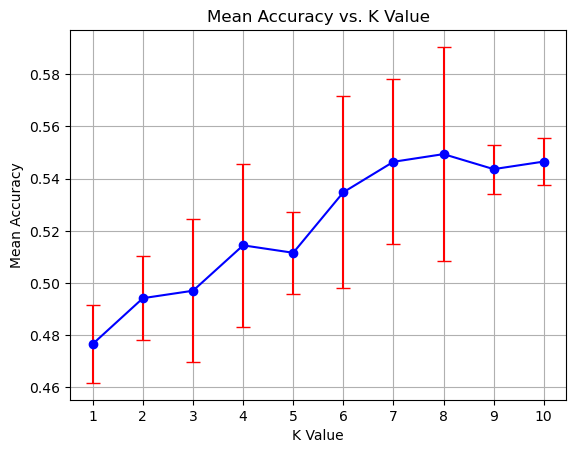

In [18]:
cv_results = grid_search.cv_results_

# Extract the mean test scores and standard deviations for each value of k
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']

# Plot mean accuracies
plt.errorbar(param_grid['n_neighbors'], mean_test_scores, yerr=std_test_scores, fmt='-o', color='b', ecolor='r', capsize=5)
plt.title('Mean Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Accuracy')
plt.xticks(param_grid['n_neighbors'])
plt.grid(True)
plt.show()

- Make the model

In [19]:
# Train the KNN classifier
k = bestK  # Number of neighbors
# Train the final model using the best k value
final_model = KNeighborsClassifier(n_neighbors=k)
final_model.fit(X_train, y_train)

# Evaluate the final model on the test set
accuracy = final_model.score(X_test, y_test)
print("Final model accuracy:", accuracy)

Final model accuracy: 0.45348837209302323


In [20]:
# Evaluate the final model on the test set
y_pred = final_model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.87      0.72        31
           1       0.30      0.50      0.37        18
           2       0.00      0.00      0.00         8
           3       0.67      0.15      0.25        13
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.50      0.14      0.22         7
           7       0.00      0.00      0.00         3

    accuracy                           0.45        86
   macro avg       0.26      0.21      0.20        86
weighted avg       0.43      0.45      0.39        86



C:\Users\kaden\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kaden\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kaden\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Results
- The KNN Classifier performed very poorly under data where the salaries were modified. The model only produced a accuracy of 0.45. Next steps will be to expand the range of data.

# KNN Classifier 
 - using 20 Mill data

In [21]:
# removing non numerical data
columns_to_remove = ['First', 'Last', 'Pos', 'Tm']
final20_df = filtered20_df.drop(columns=columns_to_remove)
final20_df

,Salary,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
53,20000000.0,8,23,56,56,32.3,6.6,9.7,0.677,0.0,0.2,0.100,6.6,9.6,0.688,0.678,2.9,4.2,0.708,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1
54,19800000.0,467,27,72,72,35.3,7.1,17.3,0.411,1.7,5.4,0.308,5.4,11.9,0.458,0.459,4.2,5.6,0.756,1.7,8.2,9.9,5.1,0.7,0.5,3.4,2.8,20.1
55,19675926.0,554,27,65,65,37.9,6.8,16.9,0.403,3.7,9.9,0.377,3.1,7.0,0.440,0.513,3.0,3.4,0.874,0.7,3.8,4.4,6.7,1.7,0.5,2.6,2.5,20.3
56,19500000.0,324,26,67,67,34.7,8.4,17.7,0.476,2.8,7.1,0.389,5.7,10.6,0.534,0.554,4.8,5.6,0.853,0.3,4.3,4.6,4.5,0.6,0.3,2.6,1.8,24.4
57,19314284.0,139,28,67,51,29.6,4.6,11.0,0.416,1.7,4.9,0.339,2.9,6.0,0.479,0.493,2.9,3.8,0.774,0.7,3.5,4.2,5.2,0.7,0.2,1.6,2.2,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,53176.0,456,23,3,0,10.3,1.7,3.7,0.455,0.0,0.7,0.000,1.7,3.0,0.556,0.455,0.7,0.7,1.000,1.3,1.7,3.0,0.0,0.3,0.3,0.3,1.3,4.0
693,53176.0,434,27,1,0,17.0,0.0,1.0,0.000,0.0,0.0,0.000,0.0,1.0,0.000,0.000,0.0,0.0,0.000,0.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0
694,53176.0,494,25,2,0,5.5,1.5,3.0,0.500,0.0,0.5,0.000,1.5,2.5,0.600,0.500,0.0,0.0,0.000,0.5,0.5,1.0,0.0,0.5,0.5,0.0,1.0,3.0
695,37223.0,505,24,4,4,43.5,4.8,13.0,0.365,0.3,2.0,0.125,4.5,11.0,0.409,0.375,1.3,1.3,1.000,0.5,4.8,5.3,7.5,1.3,1.0,2.5,3.8,11.0


### Creating bins for players based on salary

In [22]:
# adding column assigning a player to a bin
num_bins = 10
final20_df['SalaryBin'] = pd.cut(final20_df['Salary'], bins=num_bins, labels=False)
final20_df = final20_df.drop(columns=['Salary'])
final20_df

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SalaryBin
53,8,23,56,56,32.3,6.6,9.7,0.677,0.0,0.2,0.100,6.6,9.6,0.688,0.678,2.9,4.2,0.708,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1,9
54,467,27,72,72,35.3,7.1,17.3,0.411,1.7,5.4,0.308,5.4,11.9,0.458,0.459,4.2,5.6,0.756,1.7,8.2,9.9,5.1,0.7,0.5,3.4,2.8,20.1,9
55,554,27,65,65,37.9,6.8,16.9,0.403,3.7,9.9,0.377,3.1,7.0,0.440,0.513,3.0,3.4,0.874,0.7,3.8,4.4,6.7,1.7,0.5,2.6,2.5,20.3,9
56,324,26,67,67,34.7,8.4,17.7,0.476,2.8,7.1,0.389,5.7,10.6,0.534,0.554,4.8,5.6,0.853,0.3,4.3,4.6,4.5,0.6,0.3,2.6,1.8,24.4,9
57,139,28,67,51,29.6,4.6,11.0,0.416,1.7,4.9,0.339,2.9,6.0,0.479,0.493,2.9,3.8,0.774,0.7,3.5,4.2,5.2,0.7,0.2,1.6,2.2,13.7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,456,23,3,0,10.3,1.7,3.7,0.455,0.0,0.7,0.000,1.7,3.0,0.556,0.455,0.7,0.7,1.000,1.3,1.7,3.0,0.0,0.3,0.3,0.3,1.3,4.0,0
693,434,27,1,0,17.0,0.0,1.0,0.000,0.0,0.0,0.000,0.0,1.0,0.000,0.000,0.0,0.0,0.000,0.0,2.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0
694,494,25,2,0,5.5,1.5,3.0,0.500,0.0,0.5,0.000,1.5,2.5,0.600,0.500,0.0,0.0,0.000,0.5,0.5,1.0,0.0,0.5,0.5,0.0,1.0,3.0,0
695,505,24,4,4,43.5,4.8,13.0,0.365,0.3,2.0,0.125,4.5,11.0,0.409,0.375,1.3,1.3,1.000,0.5,4.8,5.3,7.5,1.3,1.0,2.5,3.8,11.0,0


In [23]:
# Prepare the features and labels
X = final20_df 
y = final20_df['SalaryBin']  # Target variable (salary)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Define a range of k values to evaluate
param_grid = {'n_neighbors': range(1, 11)}  # Example range from 1 to 20

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get the best k value
bestK = grid_search.best_params_['n_neighbors']

print("Best K value is:", bestK)

Best K value is: 5


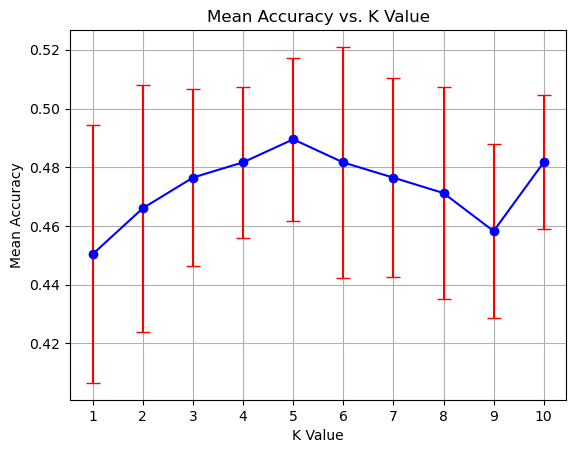

In [25]:
cv_results = grid_search.cv_results_

# Extract the mean test scores and standard deviations for each value of k
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']

# Plot mean accuracies
plt.errorbar(param_grid['n_neighbors'], mean_test_scores, yerr=std_test_scores, fmt='-o', color='b', ecolor='r', capsize=5)
plt.title('Mean Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Accuracy')
plt.xticks(param_grid['n_neighbors'])
plt.grid(True)
plt.show()

In [26]:
# Train the KNN classifier
k = bestK  # Number of neighbors
# Train the final model using the best k value
final_model = KNeighborsClassifier(n_neighbors=k)
final_model.fit(X_train, y_train)

# Evaluate the final model on the test set
accuracy = final_model.score(X_test, y_test)
print("Final model accuracy:", accuracy)

Final model accuracy: 0.5360824742268041


In [27]:
# Evaluate the final model on the test set
y_pred = final_model.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division='warn'))

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.90      0.77        49
           1       0.29      0.38      0.32        16
           2       0.20      0.17      0.18         6
           3       0.00      0.00      0.00         3
           4       0.33      0.08      0.13        12
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         1

    accuracy                           0.54        97
   macro avg       0.15      0.15      0.14        97
weighted avg       0.44      0.54      0.47        97



C:\Users\kaden\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kaden\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kaden\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Results
- Unfortunatly the model still was poor performing. It performed slightly better than the previous KNN Classifier Model. The model produced an accuracy of 0.54.

## Overall

- The idea of predicting what group a play fits into in the right idea since predicting the exact salary is very difficult. However the KNN Classifiers Model clearly isn't the best model for this data. 

- Despite the difficulty I would like to try Random Forest Regressor Model to try and predict the salary without grouping the players.

#### Realizations
- There are factors that may influence a players salary that do not show up in a statsheet. Factors such as leadership, expirience and character are all traits that are looked for in athlete that are not quantitative data.